In [ ]:
pip install keras==2.12.0

In [ ]:
import tensorflow as tf
from keras.datasets import mnist
from keras import models
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
(train_images,train_labels), (test_images,test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_labels.shape

(60000,)

[]

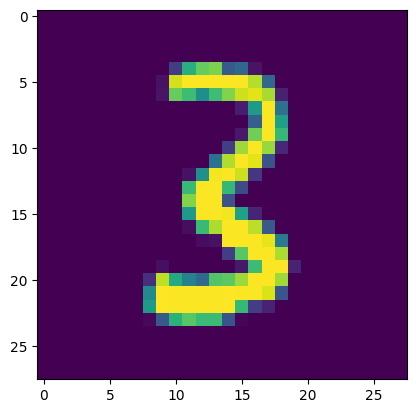

In [ ]:
digit = train_images[50000]
plt.imshow(digit)
plt.plot()

In [ ]:
#Data normalization in keras

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

In [ ]:
def CreateModel():
  network = models.Sequential()

  #defining a model
  network.add(Dense(784, activation='relu',input_shape=(784,)))
  network.add(Dense(10,activation='softmax'))
  network.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  return network

In [ ]:
model = KerasClassifier(build_fn=CreateModel, verbose=0)

<ipython-input-8-0bae06cf70a5>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=CreateModel, verbose=0)


In [ ]:
batch_size = [2,6]
epochs = [2,4]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(train_images, train_labels)

KeyboardInterrupt: ignored

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

NameError: ignored